1. На сайте https://www.kaggle.com/datasets выбрать набор данных каждому студенту индивидуально. Лучше всего выбирать датасеты в предметной области исходя из личных предпочтений. Не стоит выбирать слишком большие наборы данных (лучше не более 100 Мб).

Я взяла этот датасет - https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset 

Атрибуты:
Attribute Information
1) id: уникальный идентификатор

2) gender: "Male", "Female" или "Other"

3) age: возраст пациента

4) hypertension: 0 если у пациента нет гипертонии, 1 если у пациента гипертония

5) heart_disease: 0 если у пациента нет сердечно-сосудистых заболеваний, 1 если есть

6) ever_married: "No" или "Yes"

7) work_type: "children", "Govt_jov", "Never_worked", "Private" или "Self-employed"

8) Residence_type: "Rural" или "Urban"

9) avg_glucose_level: средний уровень глюкозы в крови

10) bmi: индекс массы тела

11) smoking_status: "formerly smoked", "never smoked", "smokes" или "Unknown"*

12) stroke: 1 если у пациента инсульт или 0 если нет

*Note: "Unknown" в smoking_status означает, что информация для этого пациента недоступна

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
#удалим сразу id за ненадобностью
df = df.drop('id', axis=1)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


2. В начале анализа следует привести общую характеристику набора данных: количество наблюдений, признаков, предметная область, содержание признаков, характер целевой переменной, задача обучения (регрессия, классификация, количество классов).

In [4]:
print(f"Всего наблюдений - {df.shape[0]}, признаков - {df.shape[1]}.")
print("Предметная область - прогноз инсульта у пациентов.")
print("Рассматриваемая задача является задачей бинарной классификации.")
print("Целевая переменная - stroke.")

Всего наблюдений - 5110, признаков - 11.
Предметная область - прогноз инсульта у пациентов.
Рассматриваемая задача является задачей бинарной классификации.
Целевая переменная - stroke.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [6]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
print(f"Сумма пропущенных значений - {df.isnull().sum().values.sum()}.")

Сумма пропущенных значений - 201.


In [8]:
categories = [i for i in df.columns if df[i].dtypes == 'O']
print(f"Категориальные признаки - {categories}.")

Категориальные признаки - ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'].


In [9]:
print("Уникальные значения признаков:")
for i in categories:
    print(f"{i} -> {len(set(df[i].unique()))}")

Уникальные значения признаков:
gender -> 3
ever_married -> 2
work_type -> 5
Residence_type -> 2
smoking_status -> 4


Количество здоровых и заболевших пациентов


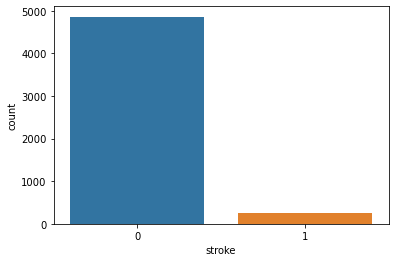

In [10]:
print("Количество здоровых и заболевших пациентов")
sns.countplot(data=df, x='stroke');

3. Провести в Jupyter средствами pandas, sklearn, seaborn описательный анализ выбранного набора включающего (но не ограниченного) следующие шаги:

    a. исследование шкалы измерения каждого существенного признака;
    
    b. построение эмпирического распределения каждого существенного признака;
    
    c. анализ количества и распределения отсутствующих значений;
    
    d. построение совместного распределения каждого признака и целевой переменной;
    
    e. построение корреляционной матрицы.

<b>a. исследование шкалы измерения каждого существенного признака<b>

In [11]:
from typing import Tuple, Union

def scale_values_getter(value: pd.Series) -> Tuple[np.dtype, int, Union[int, str], Union[int, str], list]:

    uniq_values = sorted(value.dropna().unique())
    shape_value = len(uniq_values)
    min_value = pd.Series(uniq_values).dropna().min()
    max_value = pd.Series(uniq_values).dropna().max()
    
    #Если категориальный признак-строка - нет смысла искать max/min
    if value.dtype == object:
        min_value, max_value = "-"*2

    return value.dtype, shape_value, min_value, max_value, uniq_values

res = df.apply(scale_values_getter).transpose()
res.columns = ["type","shape","min_value", "max_value", "uniq_values"]
res

,type,shape,min_value,max_value,uniq_values
gender,object,3,-,-,"[Female, Male, Other]"
age,float64,104,0.08,82.0,"[0.08, 0.16, 0.24, 0.32, 0.4, 0.48, 0.56, 0.64..."
hypertension,int64,2,0,1,"[0, 1]"
heart_disease,int64,2,0,1,"[0, 1]"
ever_married,object,2,-,-,"[No, Yes]"
work_type,object,5,-,-,"[Govt_job, Never_worked, Private, Self-employe..."
Residence_type,object,2,-,-,"[Rural, Urban]"
avg_glucose_level,float64,3979,55.12,271.74,"[55.12, 55.22, 55.23, 55.25, 55.26, 55.27, 55...."
bmi,float64,418,10.3,97.6,"[10.3, 11.3, 11.5, 12.0, 12.3, 12.8, 13.0, 13...."
smoking_status,object,4,-,-,"[Unknown, formerly smoked, never smoked, smokes]"


<b>b. построение эмпирического распределения каждого существенного признака

In [12]:
num = [i for i in df.columns if df[i].dtypes != 'O']
num

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']

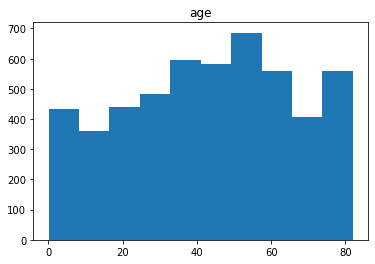

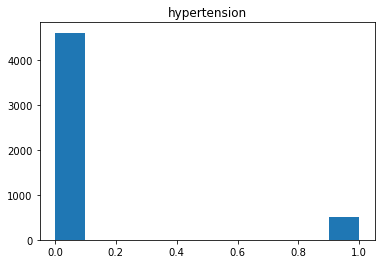

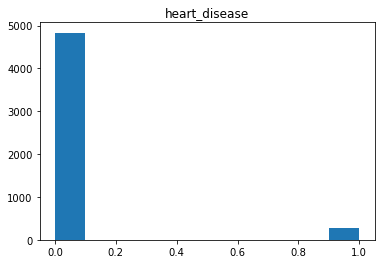

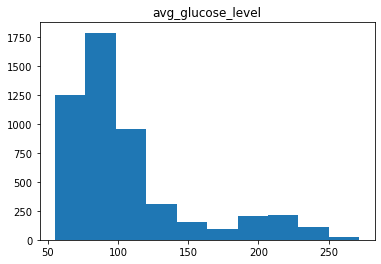

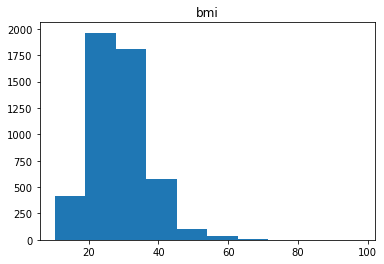

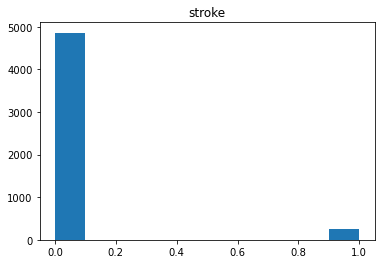

In [13]:
for column in num:
    plt.hist(df[column])
    plt.title(column)
    plt.show()

In [14]:
print("К нормальному распределению близки признаки: 'age', 'avg_glucose_level' и 'bmi'.")

К нормальному распределению близки признаки: 'age', 'avg_glucose_level' и 'bmi'.


<b>c. анализ количества и распределения отсутствующих значений

In [15]:
df.shape

(5110, 11)

In [16]:
full_series = df.dropna().count()
full_series

gender               4909
age                  4909
hypertension         4909
heart_disease        4909
ever_married         4909
work_type            4909
Residence_type       4909
avg_glucose_level    4909
bmi                  4909
smoking_status       4909
stroke               4909
dtype: int64

<b>d. построение совместного распределения каждого признака и целевой переменной

In [17]:
grouped_df = pd.DataFrame(df.groupby(['stroke']).count())
grouped_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
stroke,,,,,,,,,,
0,4861,4861,4861,4861,4861,4861,4861,4861,4700,4861
1,249,249,249,249,249,249,249,249,209,249


<b>e. построение корреляционной матрицы

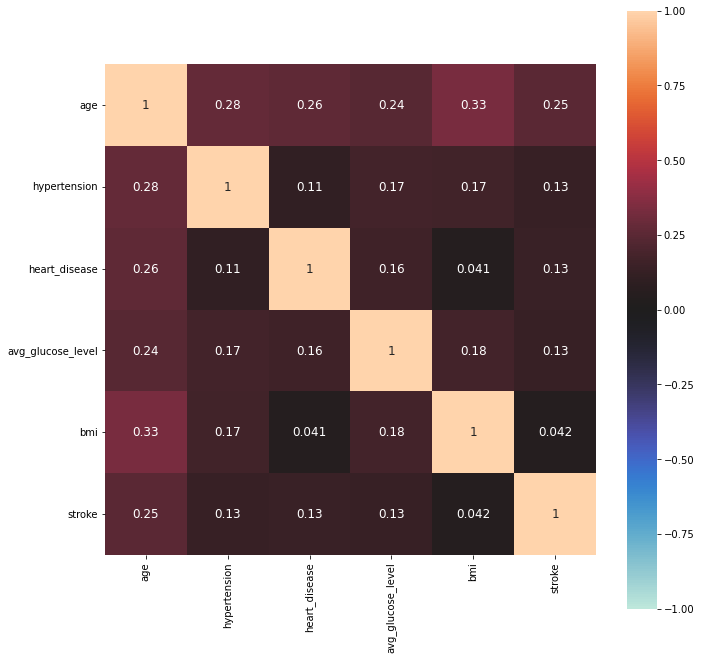

In [18]:
ax = sns.heatmap(
    df.corr(),
    annot=True,
    annot_kws={'size': 12},
    vmin=-1, vmax=1, center=0,
    square=True
)
ax.figure.set_size_inches(11, 11)

In [19]:
print("Для целевой переменной stroke особых корреляций от отдельного фактора не выявлено")

Для целевой переменной stroke особых корреляций от отдельного фактора не выявлено


5. Провести подготовительную обработку данных, включающую следующие шаги:

    a. удаление или заполнение отсутствующих значений;

    b. приведение всех признаков к бинарной либо числовой шкале;

    c. удаление несущественных либо избыточных признаков;

    d. другие необходимые действия в зависимости от набора данных и задачи (группировка, удаление аномалий, и др.).

<b>a. удаление или заполнение отсутствующих значений

In [20]:
# Узнаем у каких признаков отсутствуют значения:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [21]:
# Т.к. ассиметрия у признака bmi достаточно большая, заменим пустые значение на среднее
fixed_df = df.copy()
fixed_df["bmi"].fillna(fixed_df['bmi'].mean(), inplace=True)

<b>b. приведение всех признаков к бинарной либо числовой шкале

In [22]:
fixed_df.head(3)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1


In [23]:
fixed_df['work_type'] = fixed_df['work_type'].map({'Private':0, 'Self-employed': 1, 'Govt_job':2, 'children':3, 'Never_worked':4})
fixed_df['gender'] = fixed_df['gender'].map({'Male':0, 'Female':1})
fixed_df['Residence_type'] = fixed_df['Residence_type'].map({'Urban':0, 'Rural':1})
fixed_df['smoking_status'] = fixed_df['smoking_status'].map({'formerly smoked':0, 'never smoked':1, 'smokes':2, 'Unknown':3})
fixed_df['ever_married'] = fixed_df['ever_married'].map({'Yes':0, 'No':1})

In [24]:
fixed_df.head(3)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.0,67.0,0,1,0,0,0,228.69,36.600000,0,1
1,1.0,61.0,0,0,0,1,1,202.21,28.893237,1,1
2,0.0,80.0,0,1,0,0,1,105.92,32.500000,1,1


<AxesSubplot:>

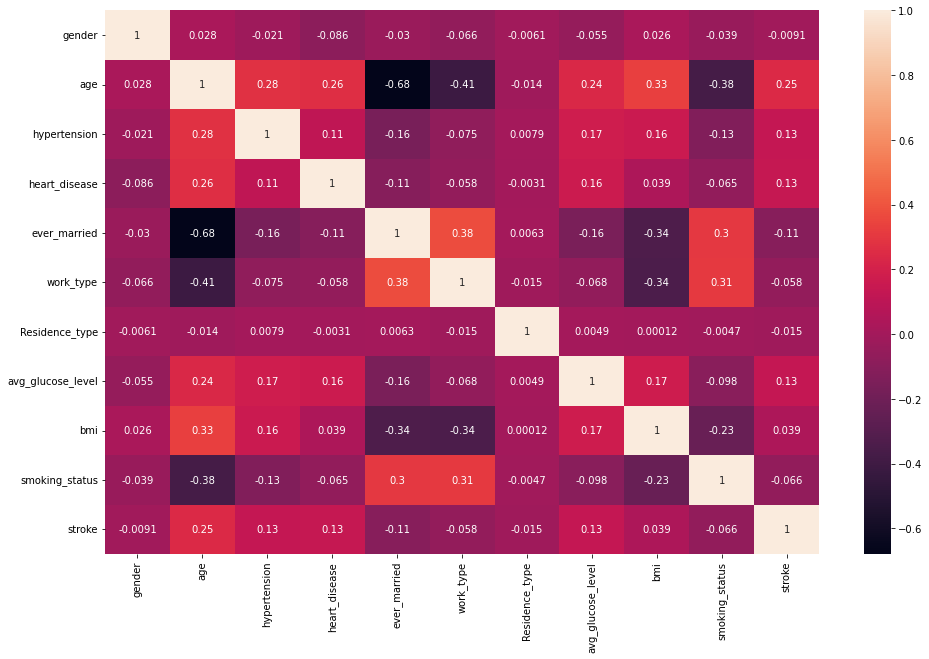

In [25]:
plt.figure(figsize=(16,10))
sns.heatmap(fixed_df.corr(method='pearson'), annot=True)

In [26]:
print("Можно увидеть, что присутствуют положительная и отрицательная корреляции, а также другие признаки имеют такие значения корреляции, что мы просто не можем удалить эти признаки.")

Можно увидеть, что присутствуют положительная и отрицательная корреляции, а также другие признаки имеют такие значения корреляции, что мы просто не можем удалить эти признаки.


6. Количественные характеристики датасета необходимо также привести после его обработки.

In [27]:
fixed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   float64
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int64  
 5   work_type          5110 non-null   int64  
 6   Residence_type     5110 non-null   int64  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int64  
 10  stroke             5110 non-null   int64  
dtypes: float64(4), int64(7)
memory usage: 439.3 KB


In [28]:
fixed_df.shape

(5110, 11)

In [29]:
fixed_df.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5109.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.586025,43.226614,0.097456,0.054012,0.343836,0.837965,0.491977,106.147677,28.893237,1.585519,0.048728
std,0.492592,22.612647,0.296607,0.226063,0.475034,1.118698,0.499985,45.283560,7.698018,1.092522,0.215320
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,77.245000,23.800000,1.000000,0.000000
50%,1.000000,45.000000,0.000000,0.000000,0.000000,0.000000,0.000000,91.885000,28.400000,1.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,2.000000,1.000000,114.090000,32.800000,3.000000,0.000000
max,1.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000
